In [39]:
#!/usr/bin/env python3
"""
Calculate pairwise CA RMSD between all PDB files in a directory.
Usage: python pairwise_ca_rmsd.py <directory_path>
Output: CSV file with pairwise RMSD values and heatmap visualization
"""

import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio.PDB import PDBParser, Selection, Superimposer
from pathlib import Path
import pandas as pd

def extract_ca_atoms(structure):
    """Extract Carbon Alpha atoms from a structure"""
    ca_atoms = []
    for model in structure:
        for chain in model:
            for residue in chain:
                if residue.has_id("CA"):
                    ca_atoms.append(residue["CA"])
    return ca_atoms

def calculate_rmsd(structure1, structure2):
    """Calculate RMSD between two structures using only CA atoms"""
    # Extract CA atoms
    ca_atoms_1 = extract_ca_atoms(structure1)
    ca_atoms_2 = extract_ca_atoms(structure2)
    
    # Check if both structures have the same number of CA atoms
    if len(ca_atoms_1) != len(ca_atoms_2):
        print(f"Warning: Different number of CA atoms: {len(ca_atoms_1)} vs {len(ca_atoms_2)}")
        # Find the minimum length to use for comparison
        min_length = min(len(ca_atoms_1), len(ca_atoms_2))
        ca_atoms_1 = ca_atoms_1[:min_length]
        ca_atoms_2 = ca_atoms_2[:min_length]
    
    # Use Superimposer to calculate RMSD
    super_imposer = Superimposer()
    super_imposer.set_atoms(ca_atoms_1, ca_atoms_2)
    return super_imposer.rms

def main():
    # Check if directory path is provided
    if len(sys.argv) != 2:
        print("Usage: python pairwise_ca_rmsd.py <directory_path>")
        sys.exit(1)
    
    # Get directory path
    dir_path = sys.argv[1]
    
    # Find all PDB files in the directory
    pdb_files = glob.glob(os.path.join(dir_path, "*.pdb"))
    
    if not pdb_files:
        print(f"No PDB files found in {dir_path}")
        sys.exit(1)
    
    print(f"Found {len(pdb_files)} PDB files")
    
    # Initialize PDB parser
    parser = PDBParser(QUIET=True)
    
    # Create a dictionary to store structures
    structures = {}
    for pdb_file in pdb_files:
        file_name = os.path.basename(pdb_file)
        structure_id = os.path.splitext(file_name)[0]
        structures[structure_id] = parser.get_structure(structure_id, pdb_file)
    
    # Calculate pairwise RMSD
    structure_ids = list(structures.keys())
    rmsd_matrix = np.zeros((len(structure_ids), len(structure_ids)))
    
    for i, id1 in enumerate(structure_ids):
        for j, id2 in enumerate(structure_ids):
            if i <= j:  # Only calculate upper triangle (including diagonal)
                rmsd = calculate_rmsd(structures[id1], structures[id2])
                rmsd_matrix[i, j] = rmsd
                rmsd_matrix[j, i] = rmsd  # Matrix is symmetric
    
    # Create DataFrame for better visualization
    rmsd_df = pd.DataFrame(rmsd_matrix, index=structure_ids, columns=structure_ids)
    
    # Save results to CSV
    output_csv = os.path.join(dir_path, "pairwise_ca_rmsd.csv")
    rmsd_df.to_csv(output_csv)
    print(f"Saved RMSD matrix to {output_csv}")
    
    # Create heatmap visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(rmsd_df, annot=True, cmap="viridis", fmt=".3f")
    plt.title("Pairwise CA RMSD between PDB structures")
    plt.tight_layout()
    
    # Save heatmap
    heatmap_path = os.path.join(dir_path, "pairwise_ca_rmsd_heatmap.png")
    plt.savefig(heatmap_path, dpi=300)
    print(f"Saved heatmap to {heatmap_path}")
    
    # Show the heatmap (comment out if running in headless environment)
    # plt.show()

if __name__ == "__main__":
    main()

No PDB files found in --f=/Users/dennisdellacorte/Library/Jupyter/runtime/kernel-v36450bf6b44ac27f77b840ae288cad48e5ce924e6.json


SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Saved RMSD matrix to /var/folders/9n/kbxcs17x681cnz5lqncq2ktc0000gp/T/tmp.RnT467Fogy/converted/pairwise_ca_rmsd.csv
Saved heatmap to /var/folders/9n/kbxcs17x681cnz5lqncq2ktc0000gp/T/tmp.RnT467Fogy/converted/pairwise_ca_rmsd_heatmap.png


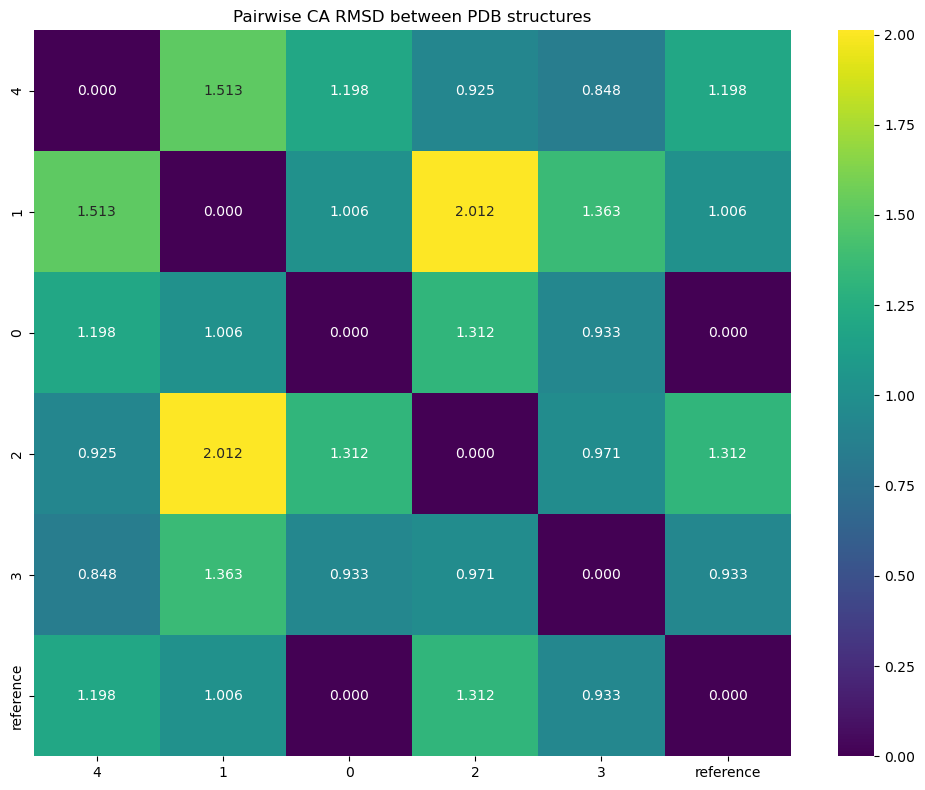

In [105]:
# Get directory path
dir_path = "/var/folders/9n/kbxcs17x681cnz5lqncq2ktc0000gp/T/tmp.RnT467Fogy/converted/"

# Find all PDB files in the directory
pdb_files = glob.glob(os.path.join(dir_path, "*.pdb"))

# Initialize PDB parser
parser = PDBParser(QUIET=True)

# Create a dictionary to store structures
structures = {}
for pdb_file in pdb_files:
    file_name = os.path.basename(pdb_file)
    structure_id = os.path.splitext(file_name)[0]
    structures[structure_id] = parser.get_structure(structure_id, pdb_file)

# Calculate pairwise RMSD
structure_ids = list(structures.keys())
rmsd_matrix = np.zeros((len(structure_ids), len(structure_ids)))

for i, id1 in enumerate(structure_ids):
    for j, id2 in enumerate(structure_ids):
        if i <= j:  # Only calculate upper triangle (including diagonal)
            rmsd = calculate_rmsd(structures[id1], structures[id2])
            rmsd_matrix[i, j] = rmsd
            rmsd_matrix[j, i] = rmsd  # Matrix is symmetric

# Create DataFrame for better visualization
rmsd_df = pd.DataFrame(rmsd_matrix, index=structure_ids, columns=structure_ids)

# Save results to CSV
output_csv = os.path.join(dir_path, "pairwise_ca_rmsd.csv")
rmsd_df.to_csv(output_csv)
print(f"Saved RMSD matrix to {output_csv}")

# Create heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(rmsd_df, annot=True, cmap="viridis", fmt=".3f")
plt.title("Pairwise CA RMSD between PDB structures")
plt.tight_layout()

# Save heatmap
heatmap_path = os.path.join(dir_path, "pairwise_ca_rmsd_heatmap.png")
plt.savefig(heatmap_path, dpi=300)
print(f"Saved heatmap to {heatmap_path}")

# Show the heatmap (comment out if running in headless environment)
# plt.show()

In [99]:
rmsd_matrix

array([[2.98827069e-15, 1.51330110e+00, 1.19800469e+00, 9.25410651e-01,
        8.48214256e-01, 1.19800469e+00],
       [1.51330110e+00, 4.02928572e-15, 1.00587809e+00, 2.01156197e+00,
        1.36345669e+00, 1.00587809e+00],
       [1.19800469e+00, 1.00587809e+00, 4.63542197e-15, 1.31234005e+00,
        9.33497704e-01, 4.63542197e-15],
       [9.25410651e-01, 2.01156197e+00, 1.31234005e+00, 9.12158903e-15,
        9.71005752e-01, 1.31234005e+00],
       [8.48214256e-01, 1.36345669e+00, 9.33497704e-01, 9.71005752e-01,
        3.91628589e-15, 9.33497704e-01],
       [1.19800469e+00, 1.00587809e+00, 4.63542197e-15, 1.31234005e+00,
        9.33497704e-01, 4.63542197e-15]])

In [100]:
structures

{'4': <Structure id=4>,
 '1': <Structure id=1>,
 '0': <Structure id=0>,
 '2': <Structure id=2>,
 '3': <Structure id=3>,
 'reference': <Structure id=reference>}

In [101]:
mask = np.eye(rmsd_matrix.shape[0], dtype=bool)
rmsd_matrix[mask] = np.nan
sorted_list = []
for idx in range(0, rmsd_matrix.shape[0]):
    print(rmsd_matrix)
    argmin_value = np.argmin(rmsd_matrix[idx])
    print(f"argmin_value: {argmin_value}")
    sorted_list.append(argmin_value)
    mask[sorted_list, argmin_value] = True
    mask[argmin_value, sorted_list] = True
    rmsd_matrix[mask] = np.nan




[[           nan 1.51330110e+00 1.19800469e+00 9.25410651e-01
  8.48214256e-01 1.19800469e+00]
 [1.51330110e+00            nan 1.00587809e+00 2.01156197e+00
  1.36345669e+00 1.00587809e+00]
 [1.19800469e+00 1.00587809e+00            nan 1.31234005e+00
  9.33497704e-01 4.63542197e-15]
 [9.25410651e-01 2.01156197e+00 1.31234005e+00            nan
  9.71005752e-01 1.31234005e+00]
 [8.48214256e-01 1.36345669e+00 9.33497704e-01 9.71005752e-01
             nan 9.33497704e-01]
 [1.19800469e+00 1.00587809e+00 4.63542197e-15 1.31234005e+00
  9.33497704e-01            nan]]
argmin_value: 0
[[           nan 1.51330110e+00 1.19800469e+00 9.25410651e-01
  8.48214256e-01 1.19800469e+00]
 [1.51330110e+00            nan 1.00587809e+00 2.01156197e+00
  1.36345669e+00 1.00587809e+00]
 [1.19800469e+00 1.00587809e+00            nan 1.31234005e+00
  9.33497704e-01 4.63542197e-15]
 [9.25410651e-01 2.01156197e+00 1.31234005e+00            nan
  9.71005752e-01 1.31234005e+00]
 [8.48214256e-01 1.36345669e+00 9

In [104]:
def find_closest_neighbors(rmsd_matrix):
    """
    Find the closest neighbor for each index in the distance matrix.
    
    Parameters:
    -----------
    rmsd_matrix : numpy.ndarray
        A square distance matrix
        
    Returns:
    --------
    sorted_list : list
        A list where each element is the index of the closest neighbor
    """
    # Create a copy to avoid modifying the original matrix
    working_matrix = rmsd_matrix.copy()
    
    # Set diagonal elements to NaN (distance to self)
    mask = np.eye(working_matrix.shape[0], dtype=bool)
    working_matrix[mask] = np.nan
    
    sorted_list = []
    
    for idx in range(working_matrix.shape[0]):
        row = working_matrix[idx]
        argmin_value = np.nanargmin(row)  # Use nanargmin to ignore NaN values
        sorted_list.append(argmin_value)
        
        # Mask the found value in all rows to avoid selecting it again
        # Set the entire column of argmin_value to NaN
        working_matrix[:, argmin_value] = np.nan
        
    return sorted_list

In [107]:
find_closest_neighbors(rmsd_matrix)

[4, 2, 5, 0, 3, 1]

In [59]:
row_index = 0
masked_row = rmsd_matrix[row_index][mask[row_index]]

In [ ]:
structure_ids = ['4', '1', '0', '2', '3', 'reference']
sorted_list = [4, 2, 5, 0, 3, 1]

['4', '1', '0', '2', '3', 'reference']

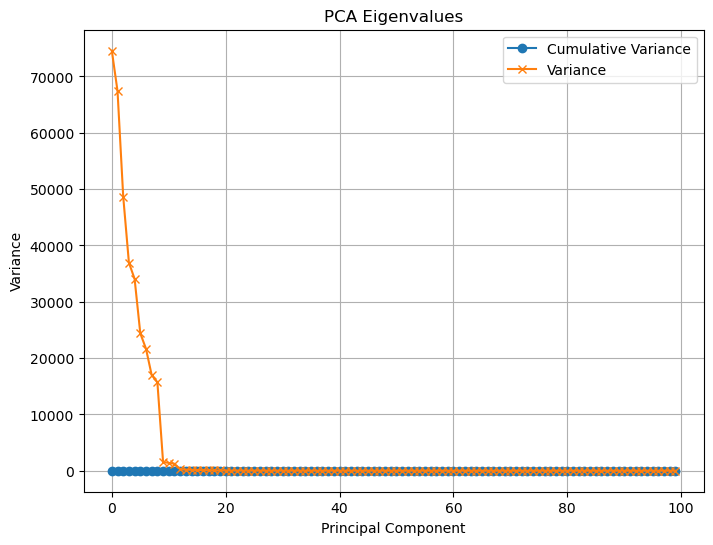

In [10]:
import MDAnalysis as mda
from MDAnalysis.analysis.pca import PCA
import matplotlib.pyplot as plt

# Load the trajectory
# Replace 'trajectory.pdb' and 'trajectory.dcd' with your actual PDB and trajectory file paths
u = mda.Universe("./traj_struct.pdb", "./traj.dcd")

# Perform PCA
pca = PCA(u, select='name *')  # Use only alpha carbons (CA atoms) for PCA
pca.run()

# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(pca.cumulated_variance[:100], marker='o', label='Cumulative Variance')
plt.plot(pca.variance[:100], marker='x', label='Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('PCA Eigenvalues')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from MDAnalysis.coordinates.memory import MemoryReader
import numpy as np
# Get the first eigenvector
first_eigenvector = pca.p_components[:, 0]

# Project along the first eigenvector
projections = pca.transform(u, n_components=100)

# Extrapolate up to 10 times the length of the eigenvector with 500 frames
scales = np.linspace(-100, 100, 500)
frames = []

for scale in scales:
    # Create a new coordinate set by scaling the first eigenvector
    new_coords = u.atoms.positions + scale * first_eigenvector.reshape(-1, 3)
    frames.append(new_coords)

# Write the trajectory to a file
u.trajectory.ts.positions = frames[0]  # Set initial positions
with mda.Writer("projected_trajectory.dcd", n_atoms=u.atoms.n_atoms) as writer:
    for frame in frames:
        u.trajectory.ts.positions = frame
        writer.write(u.atoms)


ValueError: operands could not be broadcast together with shapes (1375,3) (6875,3) 